In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [52]:
data = pd.read_csv(r"D:\STARTUP CASE STUDY\STARTUP-FUNDING\startup_funding.csv")
data.head(3)


,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN


# EXPLORING THE DATASET

In [53]:
data.shape

(3044, 10)

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


In [55]:
# Lets drop the reducdant column

data.drop(columns='Remarks',inplace=True)

In [56]:
data.set_index('Sr No',inplace=True)

In [57]:
data.head(2)

,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD
Sr No,,,,,,,,
1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"
2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394"


In [58]:
# As all the columns objects we have to convert the amount in usd to int and date to Datetime format
# lets deal with Amount column first
data['Amount in USD'] = (
    data['Amount in USD']
        .str.replace(',', '')
        .pipe(pd.to_numeric, errors='coerce')
        .round(0)          # round to nearest integer
        .astype('Int64')   # now safe
)



In [59]:
data['Amount in USD']

Sr No
1       200000000
2         8048394
3        18358860
4         3000000
5         1800000
          ...    
3040      4500000
3041       825000
3042      1500000
3043         <NA>
3044       140000
Name: Amount in USD, Length: 3044, dtype: Int64

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3044 entries, 1 to 3044
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Date dd/mm/yyyy    3044 non-null   object
 1   Startup Name       3044 non-null   object
 2   Industry Vertical  2873 non-null   object
 3   SubVertical        2108 non-null   object
 4   City  Location     2864 non-null   object
 5   Investors Name     3020 non-null   object
 6   InvestmentnType    3040 non-null   object
 7   Amount in USD      2065 non-null   Int64 
dtypes: Int64(1), object(7)
memory usage: 217.0+ KB


In [61]:
# Lets convert the date column and check the correlation with the target variable i.e. Amount in usd
fixed_dates = pd.to_datetime(
    data['Date dd/mm/yyyy'],
    dayfirst=True,
    errors='coerce'
)

corr_value = fixed_dates.astype('int64').corr(data['Amount in USD'])

print(corr_value)


0.01428205700258162


In [62]:
# as we can see that there is no correlation between date and amount(target variable) so we can drop this column
data.drop(columns='Date dd/mm/yyyy',inplace=True)

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3044 entries, 1 to 3044
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Startup Name       3044 non-null   object
 1   Industry Vertical  2873 non-null   object
 2   SubVertical        2108 non-null   object
 3   City  Location     2864 non-null   object
 4   Investors Name     3020 non-null   object
 5   InvestmentnType    3040 non-null   object
 6   Amount in USD      2065 non-null   Int64 
dtypes: Int64(1), object(6)
memory usage: 193.2+ KB


In [64]:
data.head(3)

,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD
Sr No,,,,,,,
1,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000
2,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394
3,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860


In [65]:
# So we have cleaned our data. Lets check the statistical summary of this column

data.describe(include='object').T

,count,unique,top,freq
Startup Name,3044,2459,Swiggy,8
Industry Vertical,2873,821,Consumer Internet,941
SubVertical,2108,1942,Online Lending Platform,11
City Location,2864,112,Bangalore,700
Investors Name,3020,2412,Undisclosed Investors,39
InvestmentnType,3040,55,Private Equity,1356


### Inference From Categorical Summary

* The dataset contains 3,044 startup funding records, but many fields have missing values (e.g., SubVertical, City Location).

* Startup Name has 2,459 unique entries, indicating most startups appear only once. Swiggy appears the most (8 times), showing multiple funding rounds.

* Industry Vertical is highly diverse with 821 unique industries, but Consumer Internet dominates with 941 entries, suggesting it’s the most active/funded sector.

* SubVertical shows very high variability (1,942 unique categories) and the most common sub-sector is Online Lending Platform, but only with 11 occurrences — showing fragmentation.

* City Location has 112 unique cities, with Bangalore leading heavily (700 entries), confirming it as India's primary startup hub.

* Investors Name has 2,412 unique investors, and the top category is Undisclosed Investors (39 times), indicating frequent lack of transparency in funding announcements.

* Investment Type shows 55 categories, with Private Equity being the most common (1,356 records), indicating that a majority of the funding captured is growth-stage or late-stage investments.

In [66]:
data.columns

Index(['Startup Name', 'Industry Vertical', 'SubVertical', 'City  Location',
       'Investors Name', 'InvestmentnType', 'Amount in USD'],
      dtype='object')

In [67]:
num_cols = ['Amount in USD']
cat_cols = ['Startup Name', 'Industry Vertical', 'SubVertical', 'City  Location',
       'Investors Name', 'InvestmentnType']

In [68]:
# LETS PERFORM UNIVARIATE ANALYSIS

In [69]:
data['Amount in USD']

Sr No
1       200000000
2         8048394
3        18358860
4         3000000
5         1800000
          ...    
3040      4500000
3041       825000
3042      1500000
3043         <NA>
3044       140000
Name: Amount in USD, Length: 3044, dtype: Int64

In [87]:
# Lets perform univariate and BIVARIATE ANALYSIS

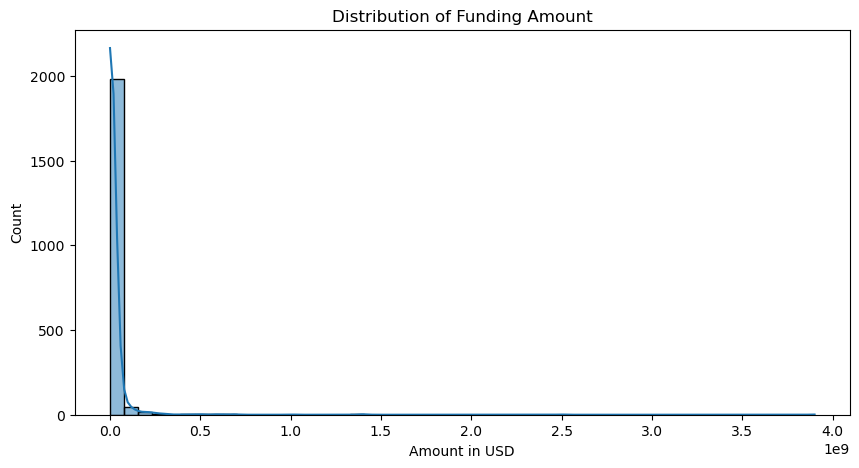

In [85]:
# -------- UNIVARIATE: NUMERIC --------
plt.figure(figsize=(10,5))
sns.histplot(data['Amount in USD'], bins=50, kde=True)
plt.title("Distribution of Funding Amount")
plt.show()

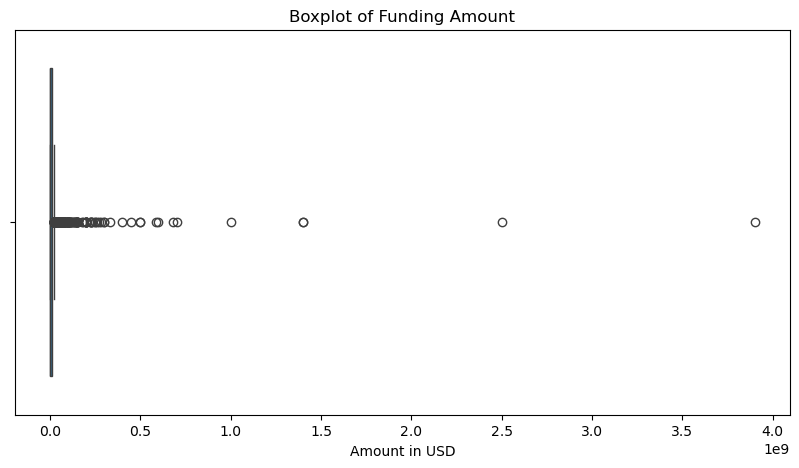

In [86]:
plt.figure(figsize=(10,5))
sns.boxplot(x=data['Amount in USD'])
plt.title("Boxplot of Funding Amount")
plt.show()

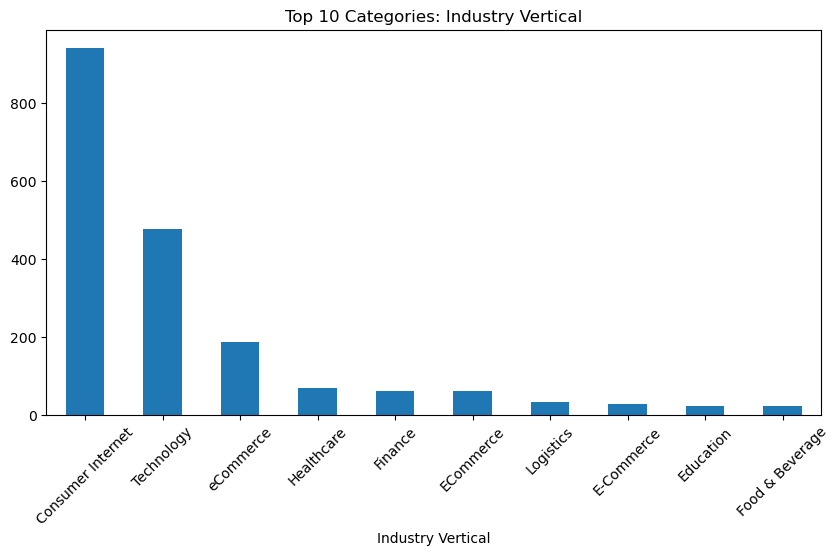

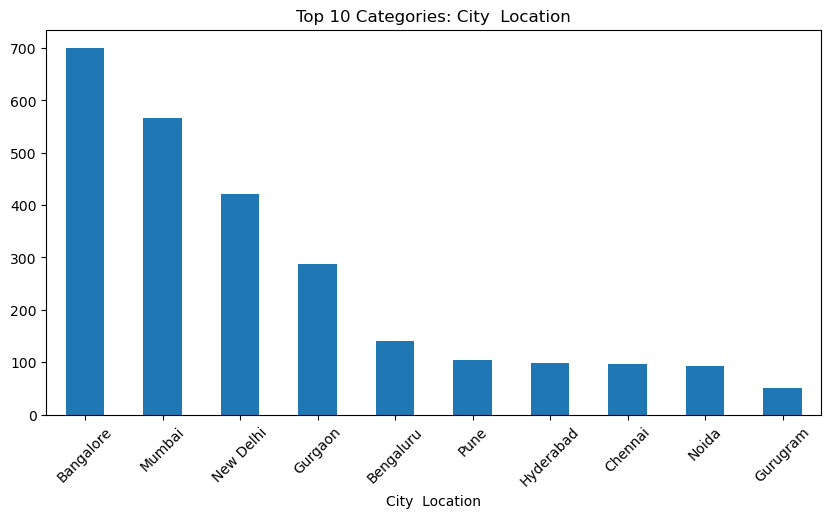

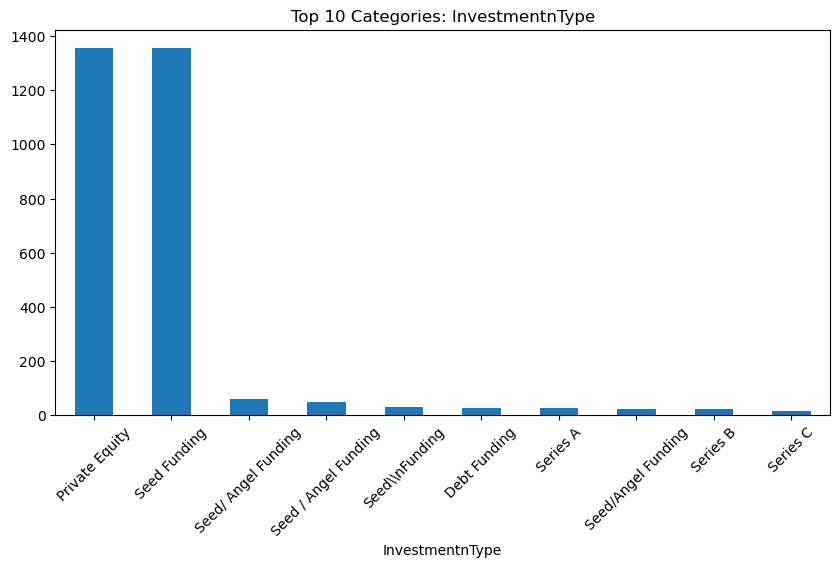

In [88]:
# -------- UNIVARIATE: CATEGORICAL (TOP 10) --------
cat_cols = ['Industry Vertical', 'City  Location', 'InvestmentnType']

for col in cat_cols:
    plt.figure(figsize=(10,5))
    data[col].value_counts().head(10).plot(kind='bar')
    plt.title(f"Top 10 Categories: {col}")
    plt.xticks(rotation=45)
    plt.show()

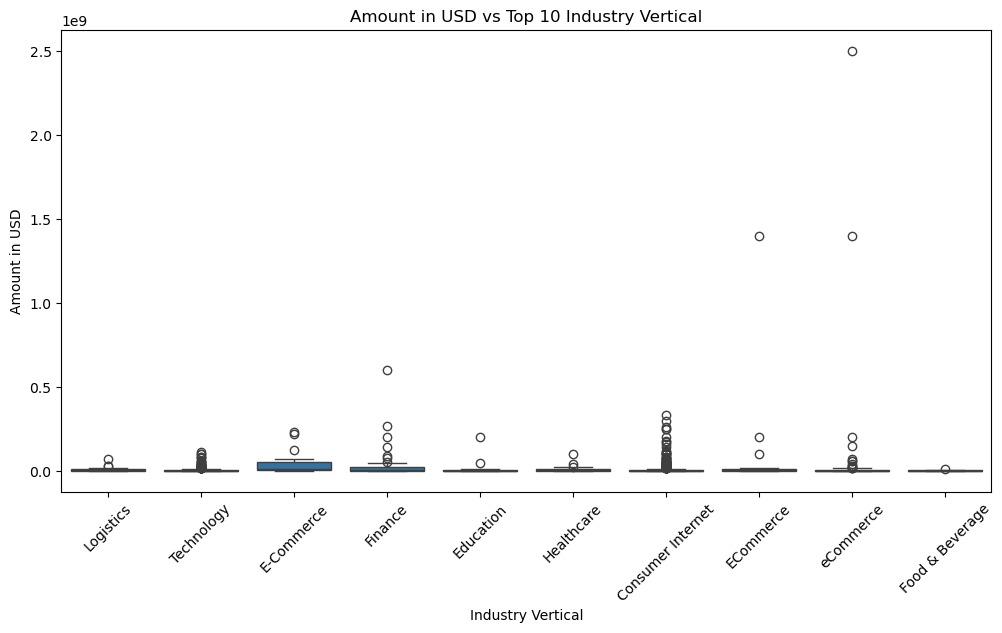

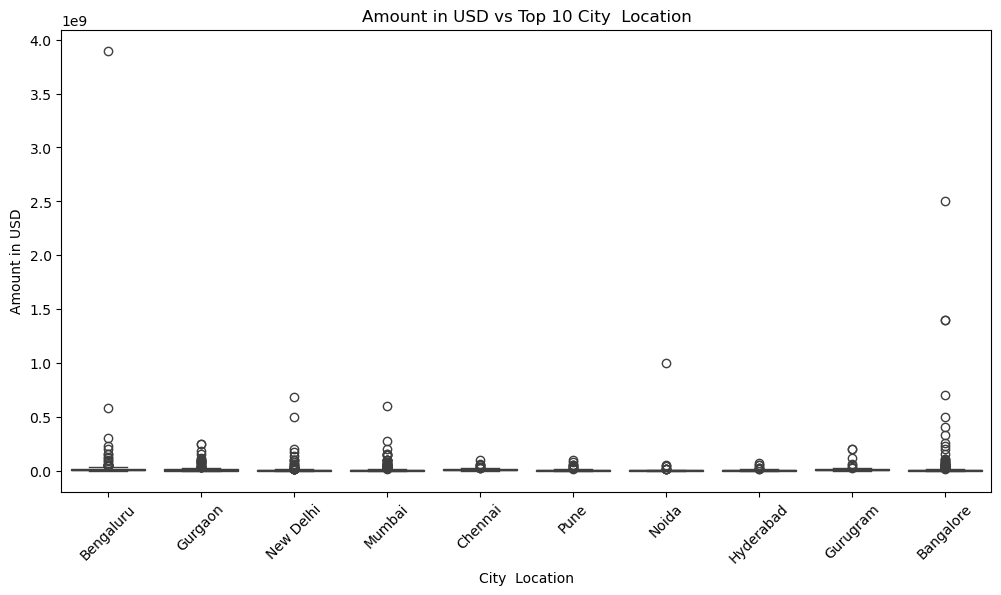

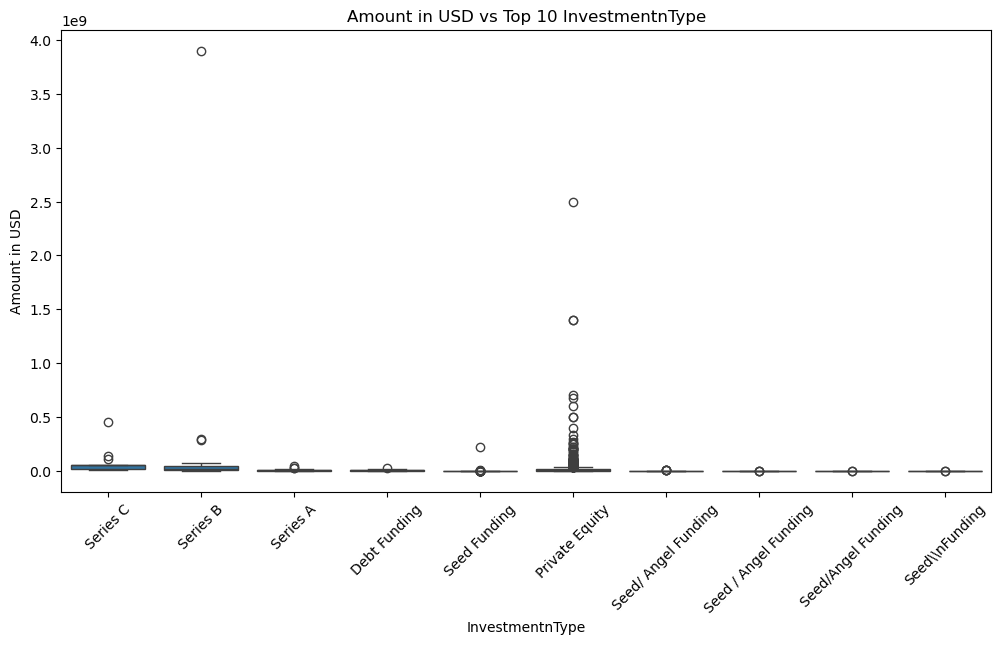

In [89]:
# -------- BIVARIATE: AMOUNT vs CATEGORICAL --------
for col in cat_cols:
    top10 = data[col].value_counts().head(10).index
    plt.figure(figsize=(12,6))
    sns.boxplot(data=data[data[col].isin(top10)], x=col, y='Amount in USD')
    plt.title(f"Amount in USD vs Top 10 {col}")
    plt.xticks(rotation=45)
    plt.show()


In [90]:
# INFERENCES

# DATA PREPROCESSING

In [92]:
# Lets check for missing values

data.isnull().sum()

Startup Name           0
Industry Vertical    171
SubVertical          936
City  Location       180
Investors Name        24
InvestmentnType        4
Amount in USD        979
dtype: int64

In [93]:
data['Industry Vertical'].unique()

array(['E-Tech', 'Transportation', 'E-commerce', 'FinTech',
       'Fashion and Apparel', 'Logistics', 'Hospitality', 'Technology',
       'E-Commerce', 'Aerospace', 'B2B-focused foodtech startup',
       'Finance', 'Video', 'Gaming', 'Software', 'Health and wellness',
       'Education', 'Food and Beverage', 'Health and Wellness',
       'B2B Marketing', 'Video Games', 'SaaS', 'Last Mile Transportation',
       'Healthcare', 'Customer Service', 'B2B', 'Consumer Goods',
       'Advertising, Marketing', 'IoT', 'Information Technology',
       'Consumer Technology', 'Accounting', 'Retail',
       'Customer Service Platform', 'Automotive', 'EdTech', 'Services',
       'Compliance', 'Transport', 'Artificial Intelligence', 'Tech',
       'Health Care', 'Luxury Label', 'Waste Management Service',
       'Deep-Tech', 'Agriculture', 'Energy', 'Digital Media', 'Saas',
       'Automobile', 'Agtech', 'Social Media', 'Fintech', 'Edtech', 'AI',
       'Ecommerce', 'Nanotechnology', 'Services Platfo

In [ ]:
# Lets replace the null values with unknown as no information is given about them and 
# we cannot compute these columns with mode as it is logically not corrext we can loose important information
cat_cols = ['Industry Vertical', 'SubVertical', 'City  Location', 'Investors Name', 'InvestmentnType']
for i in cat_cols:
    data[i] = data[i].fillna('Unknown')


In [96]:
data.isnull().sum()

Startup Name           0
Industry Vertical      0
SubVertical            0
City  Location         0
Investors Name         0
InvestmentnType        0
Amount in USD        979
dtype: int64

In [101]:
# We cannot train a supervised ML model without a target value.
# We cannot impute (fill) funding amounts because that introduces fake data.
# Models like RandomForest, Linear Regression, XGBoost require target values to be present.
# Filling missing target values will lead to incorrect model predictions and leakage.
# So in amount in usd we have to drop the rows having missing values

data = data.dropna(subset='Amount in USD')

In [102]:
data.isnull().sum()

Startup Name         0
Industry Vertical    0
SubVertical          0
City  Location       0
Investors Name       0
InvestmentnType      0
Amount in USD        0
dtype: int64

In [103]:
# We have treated all the null values in data 

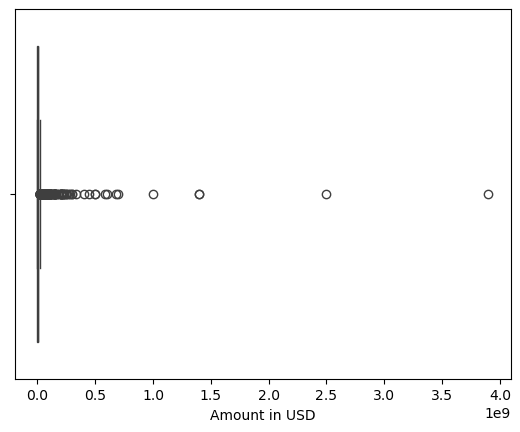

In [104]:
sns.boxplot(data=data,x='Amount in USD')
plt.show()

In [ ]:
# in our datasets, the large amounts are NOT errors — they are real:
# Big companies (Byju’s, Swiggy, OYO) raise massive funding
# Early startups raise small amounts
# This natural variation must remain in the model
# Removing outliers here = removing actual valid information
# our model will become unrealistic and lose predictive power.
# SO we can not remove the outliers but we can transform the data using log1p method
# This does: Compresses huge values, Spreads out small values, Makes the distribution closer to normal

data['Amount in USD'] = np.log1p(data['Amount in USD'])

In [107]:
data['Amount in USD']

# So OUR TARGET COLUMN IS TRANSFORMED

Sr No
1       19.113828
2       15.900983
3       16.725623
4       14.914123
5       14.403298
          ...    
3039    14.731802
3040    15.319588
3041     13.62314
3042    14.220976
3044    11.849405
Name: Amount in USD, Length: 2065, dtype: Float64

In [108]:
data.columns

Index(['Startup Name', 'Industry Vertical', 'SubVertical', 'City  Location',
       'Investors Name', 'InvestmentnType', 'Amount in USD'],
      dtype='object')

In [117]:
cat_cols = ['Startup Name', 'Industry Vertical', 'SubVertical', 'City  Location',
       'Investors Name', 'InvestmentnType']

for col in cat_cols:
    print(col, ':\n', data[col].value_counts(), "\n")


Startup Name :
 Startup Name
Swiggy           8
Ola Cabs         7
Toppr            5
Medinfi          5
Capital Float    5
                ..
Bolo App         1
RateGain         1
Wishberry        1
ShopClues        1
Refiral          1
Name: count, Length: 1696, dtype: int64 

Industry Vertical :
 Industry Vertical
Consumer Internet             589
Technology                    310
Unknown                       131
eCommerce                     126
Finance                        57
                             ... 
Startup Analytics platform      1
Financial Markets Software      1
Hiring Analytics platform       1
Online Travel Marketplace       1
Customer Service                1
Name: count, Length: 584, dtype: int64 

SubVertical :
 SubVertical
Unknown                              647
Online Lending Platform               11
Online Pharmacy                        5
Education                              5
Online Lending                         5
                                  

In [118]:
# statistical test 
# Scaling and how to use it